<a href="https://colab.research.google.com/github/santiagoprado12/Tesis/blob/main/pre_procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# make sure to install these packages before running:
#!pip install pandas
!pip install sodapy
##
##
import pandas as pd
from sodapy import Socrata
 
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)
 
# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")
 
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("gt2j-8ykr",limit=2100000) 
 
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
import datetime 
import numpy as np

In [3]:
print(pd.isnull(results_df["fecha_diagnostico"]).values.ravel().sum())#Cuantos NA hay en la columna de fecha de diagnóstico
 
results_df["fecha_diagnostico"]=results_df["fecha_diagnostico"].fillna(method="ffill")#rellenar con el ultimo valor diferente de NAN

4283


In [4]:
results_df["muerte/recuperacion"]=results_df["fecha_recuperado"] #Creando una columna Muertos/Recuperados donde se pone la fecha de recuperado o en su defecto la de muerte
results_df["muerte/recuperacion"].fillna(results_df["fecha_muerte"], inplace=True) #Rellenar valores faltantes con las fechas de fallecimientos
results_df["muerte/recuperacion"]=results_df["muerte/recuperacion"].fillna(method="ffill")#rellenar con el ultimo valor diferente de NAN

In [5]:
results_df["Fecha_diag_date_fmat"]=[datetime.datetime.strptime(str(x),"%d/%m/%Y %H:%M:%S") for x in results_df["fecha_diagnostico"]]#Creando una nueva columna formato datetime
results_df["Fecha_M/R_date_fmat"]=[datetime.datetime.strptime(str(x),"%d/%m/%Y %H:%M:%S") for x in results_df["muerte/recuperacion"]]#Creando una nueva columna formato datetime

In [6]:
results_df[results_df["recuperado"]=="Activo"]

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,fuente_tipo_contagio,ubicacion,estado,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_,fecha_muerte,muerte/recuperacion,Fecha_diag_date_fmat,Fecha_M/R_date_fmat
701528,11/9/2020 0:00:00,701569,9/9/2020 0:00:00,11,BOGOTA,11001,BOGOTA,56,1,M,En estudio,Hospital,Moderado,NaN,NaN,Activo,9/9/2020 0:00:00,10/9/2020 0:00:00,NaN,NaN,6,NaN,NaN,27/9/2020 0:00:00,2020-09-10,2020-09-27
701865,11/9/2020 0:00:00,701906,8/9/2020 0:00:00,11,BOGOTA,11001,BOGOTA,30,1,F,En estudio,Hospital,Moderado,NaN,NaN,Activo,4/9/2020 0:00:00,8/9/2020 0:00:00,NaN,NaN,6,NaN,NaN,26/9/2020 0:00:00,2020-09-08,2020-09-26
715508,13/9/2020 0:00:00,715549,10/9/2020 0:00:00,11,BOGOTA,11001,BOGOTA,57,1,M,En estudio,Hospital,Moderado,NaN,NaN,Activo,9/9/2020 0:00:00,11/9/2020 0:00:00,NaN,NaN,6,NaN,NaN,5/10/2020 0:00:00,2020-09-11,2020-10-05
719560,14/9/2020 0:00:00,719601,11/9/2020 0:00:00,11,BOGOTA,11001,BOGOTA,58,1,M,En estudio,Hospital,Moderado,NaN,NaN,Activo,2/9/2020 0:00:00,13/9/2020 0:00:00,NaN,NaN,6,NaN,NaN,30/10/2020 0:00:00,2020-09-13,2020-10-30
726719,15/9/2020 0:00:00,726760,12/9/2020 0:00:00,11,BOGOTA,11001,BOGOTA,69,1,M,En estudio,Hospital,Moderado,NaN,NaN,Activo,6/9/2020 0:00:00,14/9/2020 0:00:00,NaN,NaN,6,NaN,NaN,26/9/2020 0:00:00,2020-09-14,2020-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099667,1/2/2021 0:00:00,2099708,25/1/2021 0:00:00,11,BOGOTA,11001,BOGOTA,62,1,M,En estudio,Hospital UCI,Grave,NaN,NaN,Activo,19/1/2021 0:00:00,28/1/2021 0:00:00,NaN,NaN,6,NaN,NaN,3/2/2021 0:00:00,2021-01-28,2021-02-03
2099687,1/2/2021 0:00:00,2099728,25/1/2021 0:00:00,11,BOGOTA,11001,BOGOTA,69,1,F,En estudio,Hospital UCI,Grave,NaN,NaN,Activo,20/1/2021 0:00:00,29/1/2021 0:00:00,NaN,NaN,6,NaN,NaN,8/2/2021 0:00:00,2021-01-29,2021-02-08
2099704,1/2/2021 0:00:00,2099745,27/1/2021 0:00:00,11,BOGOTA,11001,BOGOTA,72,1,M,En estudio,Hospital,Moderado,NaN,NaN,Activo,23/1/2021 0:00:00,28/1/2021 0:00:00,NaN,NaN,6,NaN,NaN,9/2/2021 0:00:00,2021-01-28,2021-02-09
2099870,1/2/2021 0:00:00,2099911,28/1/2021 0:00:00,11,BOGOTA,11001,BOGOTA,61,1,M,En estudio,Hospital,Moderado,NaN,NaN,Activo,27/1/2021 0:00:00,29/1/2021 0:00:00,NaN,NaN,6,NaN,NaN,10/2/2021 0:00:00,2021-01-29,2021-02-10


In [7]:
results_df.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,fuente_tipo_contagio,ubicacion,estado,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_,fecha_muerte,muerte/recuperacion,Fecha_diag_date_fmat,Fecha_M/R_date_fmat
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380,ITALIA,Recuperado,27/2/2020 0:00:00,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6,NaN,NaN,13/3/2020 0:00:00,2020-03-06,2020-03-13
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724,ESPAÑA,Recuperado,4/3/2020 0:00:00,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5,NaN,NaN,19/3/2020 0:00:00,2020-03-09,2020-03-19
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724,ESPAÑA,Recuperado,29/2/2020 0:00:00,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6,NaN,NaN,15/3/2020 0:00:00,2020-03-09,2020-03-15
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6,NaN,NaN,26/3/2020 0:00:00,2020-03-11,2020-03-26
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6,NaN,NaN,23/3/2020 0:00:00,2020-03-11,2020-03-23


In [8]:
results_df["recuperado"].unique()

array(['Recuperado', 'Fallecido', 'N/A', 'fallecido', 'Activo'],
      dtype=object)

In [9]:
results_df[(results_df["recuperado"]=='N/A') & pd.isnull(results_df["fecha_muerte"])]

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,fuente_tipo_contagio,ubicacion,estado,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_,fecha_muerte,muerte/recuperacion,Fecha_diag_date_fmat,Fecha_M/R_date_fmat
15582,18/5/2020 0:00:00,15623,12/5/2020 0:00:00,13001,CARTAGENA,13001,CARTAGENA,31,1,F,Relacionado,N/A,N/A,NaN,NaN,N/A,5/5/2020 0:00:00,18/5/2020 0:00:00,NaN,NaN,6,NaN,NaN,5/6/2020 0:00:00,2020-05-18,2020-06-05
36029,5/6/2020 0:00:00,36070,5/6/2020 0:00:00,5,ANTIOQUIA,5154,CAUCASIA,64,1,F,En estudio,N/A,N/A,NaN,NaN,N/A,1/6/2020 0:00:00,5/6/2020 0:00:00,NaN,NaN,6,NaN,NaN,11/6/2020 0:00:00,2020-06-05,2020-06-11
36197,5/6/2020 0:00:00,36238,31/5/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,41,1,M,En estudio,N/A,N/A,NaN,NaN,N/A,28/5/2020 0:00:00,5/6/2020 0:00:00,NaN,NaN,6,NaN,NaN,1/7/2020 0:00:00,2020-06-05,2020-07-01
42777,10/6/2020 0:00:00,42818,4/6/2020 0:00:00,76,VALLE,76109,BUENAVENTURA,78,1,F,En estudio,N/A,N/A,NaN,NaN,N/A,29/4/2020 0:00:00,10/6/2020 0:00:00,NaN,NaN,5,NaN,NaN,22/6/2020 0:00:00,2020-06-10,2020-06-22
53976,16/6/2020 0:00:00,54017,12/6/2020 0:00:00,13001,CARTAGENA,13001,CARTAGENA,61,1,F,En estudio,N/A,N/A,NaN,NaN,N/A,11/6/2020 0:00:00,16/6/2020 0:00:00,NaN,NaN,6,NaN,NaN,30/6/2020 0:00:00,2020-06-16,2020-06-30


In [10]:
def ta_todo(f):
    e=results_df[(results_df["Fecha_diag_date_fmat"]<f) & (f<results_df["Fecha_M/R_date_fmat"])].shape[0]
    r=results_df[(results_df["Fecha_M/R_date_fmat"]<f) & pd.isnull(results_df["fecha_muerte"])].shape[0]
    fa=results_df[(results_df["Fecha_M/R_date_fmat"]<f) & ~pd.isnull(results_df["fecha_muerte"])].shape[0]
    mr=results_df[results_df["Fecha_M/R_date_fmat"]<f].shape[0]
    return e, r, fa, mr

In [11]:
fecha_mayor=str(results_df["fecha_de_notificaci_n"].unique()[-1])
fecha_mayor1=datetime.datetime.strptime(str(fecha_mayor),"%d/%m/%Y %H:%M:%S")

In [12]:
c=str(results_df["fecha_de_notificaci_n"][0])
c1=datetime.datetime.strptime(c,"%d/%m/%Y %H:%M:%S")
c2=[c1]
i=1
while c2[-1] != fecha_mayor1:
    c2.append(c2[0]+datetime.timedelta(days=i))
    i+=1

In [13]:
casos_diarios={}

In [14]:
casos_diarios["fechas"]=c2

In [15]:
casos_diarios_DF=pd.DataFrame(data=casos_diarios)

In [16]:
casos_diarios_DF

,fechas
0,2020-03-02
1,2020-03-03
2,2020-03-04
3,2020-03-05
4,2020-03-06
...,...
332,2021-01-28
333,2021-01-29
334,2021-01-30
335,2021-01-31


In [17]:
a=np.array(list(map(ta_todo, casos_diarios_DF["fechas"])))

In [18]:
casos_diarios_DF["enfermos_diarios"]=list(a[:,0])
casos_diarios_DF["recuperados_diarios"]=list(a[:,1])
casos_diarios_DF["fallecidos_diarios"]=list(a[:,2])
casos_diarios_DF["m/r_diarios"]=list(a[:,3])

In [19]:
casos_diarios_DF["comprobacion"]=list(map(lambda x, y, z: x+y==z, casos_diarios_DF["recuperados_diarios"],casos_diarios_DF["fallecidos_diarios"],casos_diarios_DF["m/r_diarios"]))

In [20]:
sum(~casos_diarios_DF["comprobacion"])

0

In [21]:
casos_diarios_DF["casos diarios"]=list(map(lambda f: (results_df[results_df["Fecha_diag_date_fmat"]==f].shape[0]), casos_diarios_DF["fechas"]))

In [22]:
results_df[results_df["Fecha_diag_date_fmat"]==casos_diarios_DF["fechas"][300]].shape

(8513, 26)

In [31]:
casos_diarios_DF

,fechas,enfermos_diarios,recuperados_diarios,fallecidos_diarios,m/r_diarios,comprobacion,casos diarios
0,2020-03-02,0,0,0,0,True,0
1,2020-03-03,0,0,0,0,True,0
2,2020-03-04,0,0,0,0,True,0
3,2020-03-05,0,0,0,0,True,0
4,2020-03-06,0,0,0,0,True,1
...,...,...,...,...,...,...,...
332,2021-01-28,120053,1882846,60377,1943223,True,8637
333,2021-01-29,111596,1899551,60717,1960268,True,5988
334,2021-01-30,102002,1916302,61042,1977344,True,3521
335,2021-01-31,91011,1931547,61351,1992898,True,1609


In [24]:
import matplotlib.pyplot as plt

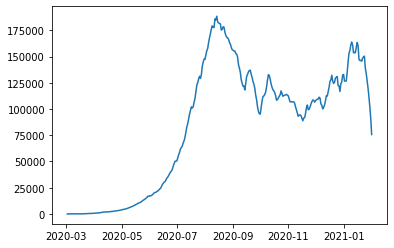

In [25]:
plt.plot(casos_diarios_DF["fechas"],casos_diarios_DF["enfermos_diarios"])

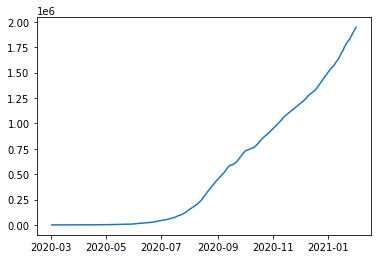

In [26]:
plt.plot(casos_diarios_DF["fechas"],casos_diarios_DF["recuperados_diarios"])

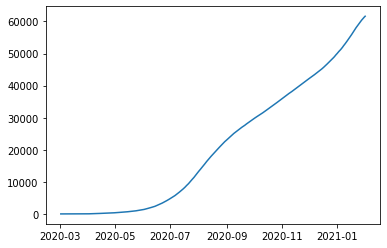

In [27]:
plt.plot(casos_diarios_DF["fechas"],casos_diarios_DF["fallecidos_diarios"])

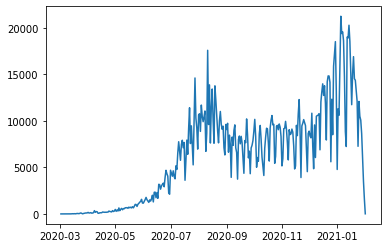

In [36]:
plt.plot(casos_diarios_DF["fechas"],casos_diarios_DF["casos diarios"])

In [29]:
casos_diarios_DF["casos diarios"].max()

21251

In [32]:
casos_diarios_DF["casos diarios 7 dias"] = casos_diarios_DF["casos diarios"].rolling(7, min_periods=1).mean()

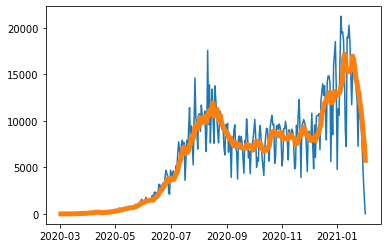

In [61]:
plt.plot(casos_diarios_DF["fechas"],casos_diarios_DF["casos diarios"])
plt.plot(casos_diarios_DF["fechas"],casos_diarios_DF["casos diarios 7 dias"],linewidth=5)

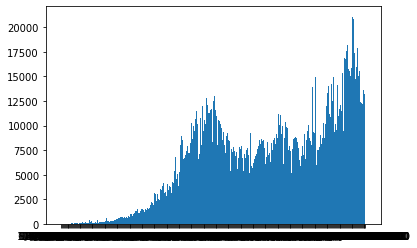

In [57]:
data=plt.hist(results_df["fecha_reporte_web"],bins=len(results_df["fecha_reporte_web"].unique())-1)

In [66]:
dataFrameAux={}
dataFrameAux["enfermos dias"]=data[0]
dataFrameAux_DF=pd.DataFrame(data=dataFrameAux)
dataFrameAux_DF["enfermos dias media 7 dias"] = dataFrameAux_DF["enfermos dias"].rolling(7, min_periods=1).mean()


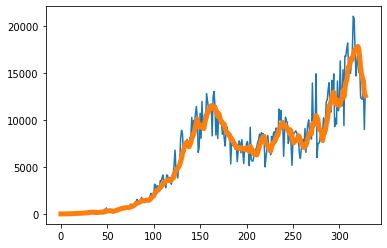

In [69]:
plt.plot(dataFrameAux_DF["enfermos dias"],)
plt.plot(dataFrameAux_DF["enfermos dias media 7 dias"], linewidth=5)

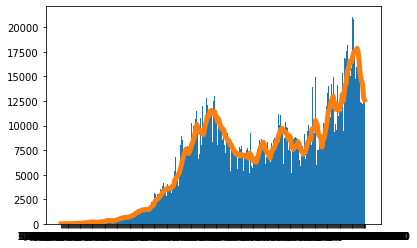

In [70]:
data=plt.hist(results_df["fecha_reporte_web"],bins=len(results_df["fecha_reporte_web"].unique())-1)
plt.plot(dataFrameAux_DF["enfermos dias media 7 dias"], linewidth=5)

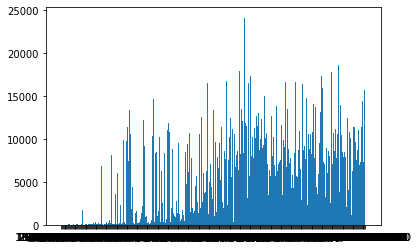

In [76]:
dataR=plt.hist(results_df[pd.notna(results_df["fecha_recuperado"])]["fecha_recuperado"],bins=len(results_df[pd.notna(results_df["fecha_recuperado"])]["fecha_recuperado"].unique())-1)

In [81]:
dataFrameAuxR={}
dataFrameAuxR["recuperados dias"]=dataR[0]
dataFrameAuxR_DF=pd.DataFrame(data=dataFrameAuxR)
dataFrameAuxR_DF["recuperados dias media 7 dias"] = dataFrameAuxR_DF["recuperados dias"].rolling(7, min_periods=1).mean()

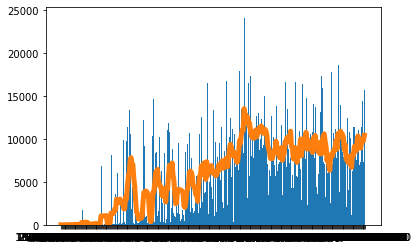

In [82]:
dataR=plt.hist(results_df[pd.notna(results_df["fecha_recuperado"])]["fecha_recuperado"],bins=len(results_df[pd.notna(results_df["fecha_recuperado"])]["fecha_recuperado"].unique())-1)
plt.plot(dataFrameAuxR_DF["recuperados dias media 7 dias"], linewidth=5)

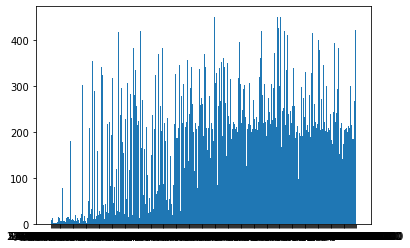

In [90]:
dataM=plt.hist(results_df[pd.notna(results_df["fecha_muerte"])]["fecha_muerte"],bins=len(results_df[pd.notna(results_df["fecha_muerte"])]["fecha_muerte"].unique())-1)

In [91]:
dataFrameAuxM={}
dataFrameAuxM["muertos dias"]=dataM[0]
dataFrameAuxM_DF=pd.DataFrame(data=dataFrameAuxM)
dataFrameAuxM_DF["muertos dias media 7 dias"] = dataFrameAuxM_DF["muertos dias"].rolling(7, min_periods=1).mean()

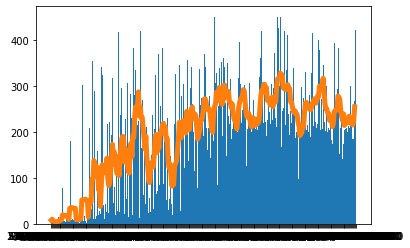

In [92]:
dataM=plt.hist(results_df[pd.notna(results_df["fecha_muerte"])]["fecha_muerte"],bins=len(results_df[pd.notna(results_df["fecha_muerte"])]["fecha_muerte"].unique())-1)
plt.plot(dataFrameAuxM_DF["muertos dias media 7 dias"], linewidth=5)